# ChEMBL Dataset
This notebook uses the official ChEMBL Python client API, linked <a href="https://github.com/chembl/chembl_webresource_client/tree/master">here</a>.  
CB2 (Cannabinoid Receptor 2) ligands with reported Ki values were chosen for this study, and elementary data analysis was conducted with the molecular properties of these compounds. The SMILES representations of these compounds as well as the molecular properties were saved in .txt and .csv files respectively for easy access without overloading the ChEMBL API, as well as for the application of deep learning methods to generate molecules.

## Dependencies

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

<br><br>
Once API call is made and data saved, replace data path with location in local repository to avoid unnecessary API calls

In [2]:
DATA_PATH = "./data/cb2_binders.csv"

### Only run following cells to originally call ChEMBL API and recieve data

In [ ]:
from chembl_webresource_client.new_client import new_client
from chembl_webresource_client.utils import utils

# columns to be selected from API
col_select = ['molecule_chembl_id', 'canonical_smiles', 'relation', 'type', 'value']

# load in dataset of all compounds with reported activity w/ any target in ChEMBL database
cb2_target = new_client.activity
# load in all CB2-specific (CHEMBL253) small mollecules w/ reported Ki value <= 450, and investigated in humans
cb2_binders = cb2_target.filter(target_chembl_id__iexact='CHEMBL253', standard_type__iexact='ki',
                                    standard_value__lte=450, target_organism='Homo sapiens').only(col_select)

print(f"\n# of CB2 binders: {len(cb2_binders)}")
print(f"\nExample Molecule: \n{cb2_binders[0]}")

In [ ]:
# cast JSON to Pandas DataFrame for easier use
cb2_binders_ki = pd.DataFrame(cb2_binders)

cb2_binders_ki

In [ ]:
# collect molecular properties from all CB2 ligands in ChEMBL API
cb2_binder_props = []
i = 0

# load in all molecular properties as JSON
# prints progress; may take excessive time on CPU unless results are cached in API
def mol_properties(chembl_id):
    global i
    i += 1
    
    mol = utils.smiles2ctab( chembl_id["canonical_smiles"] )
    props = json.loads( utils.chemblDescriptors(mol) )[0]
    props['molecule_chembl_id'] = chembl_id['molecule_chembl_id']

    cb2_binder_props.append( props )
    
    print(f"{ round((i / len(cb2_binders_ki) *100), 2) }%. {i} molecules properties found. ")

cb2_binders_ki.apply(mol_properties, axis=1)

print(len(cb2_binder_props))
cb2_binder_props[0]

In [ ]:
# cast JSON to Pandas DataFrame for easier use
cb2_binder_properties = pd.DataFrame(cb2_binder_props)

cb2_binder_properties

In [ ]:
# save both DataFrames as CSV files to avoid calling API excessively
cb2_binders_ki.to_csv("cb2_binders_wo_props.csv")
cb2_binder_properties.to_csv("cb2_binders_props_only.csv")

In [ ]:
# merge molecular properties and Ki information into one DataFrame based on ChEMBL ID and save as CSV file
cb2_molecules = pd.merge(cb2_binders_ki, cb2_binder_properties, on='molecule_chembl_id')
cb2_molecules.to_csv("cb2_binders.csv")

cb2_molecules

### If data downloaded to local repository, read data from CSV file here

In [3]:
# read in all CB2 ligands w/ Ki information and other molecular properties
cb2_molecules = pd.read_csv(DATA_PATH)

In [4]:
# remove unneeded columns and molecular properties
cols_to_drop = ["HeavyAtomCount", "NumAromaticRings", "NumHAcceptors", "NumHDonors", 
                    "NumRotatableBonds", "MolLogP", "MolecularFormula", "Ro3Pass", "MonoisotopicMolWt"]
cb2_molecules.drop(cols_to_drop, axis=1, inplace=True)

cb2_molecules

,Unnamed: 0,canonical_smiles,molecule_chembl_id,relation,type,value,qed,MolWt,TPSA,NumRo5
0,0,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCCc1ccoc1,CHEMBL39335,=,Ki,400.0,0.225228,397.603,42.24,1
1,1,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1
2,2,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1
3,3,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1
4,4,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1
...,...,...,...,...,...,...,...,...,...,...
12847,12847,Cc1c(Br)cn(Cc2ccc(F)cc2)c(=O)c1NC(=O)C1CCCCCC1,CHEMBL4467500,=,Ki,19.0,0.686489,435.337,51.10,1
12848,12848,Cc1c(Br)cn(CCCc2cn(CCCCCn3c(C)c(Br)cc(C(=O)NC4...,CHEMBL5193398,=,Ki,1.4,0.127080,831.695,132.91,2
12849,12849,Cc1nc(OCCCCCn2cc(CCCn3cc(Br)c(C)c(NC(=O)C4CCCC...,CHEMBL5204176,=,Ki,1.9,0.116572,831.695,133.03,2
12850,12850,CCCCOc1c(OC)ccc2cc(C(=O)NC3CCCCC3)c(=O)[nH]c12,CHEMBL2068805,=,Ki,9.6,0.725029,372.465,80.42,0


In [5]:
# create column to investigate length of SMILES representations for all molecules
def smiles_length(chembl_id):
    return len(chembl_id["canonical_smiles"])

cb2_molecules["smiles_length"] = cb2_molecules.apply(smiles_length, axis=1)
cb2_molecules

,Unnamed: 0,canonical_smiles,molecule_chembl_id,relation,type,value,qed,MolWt,TPSA,NumRo5,smiles_length
0,0,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCCc1ccoc1,CHEMBL39335,=,Ki,400.0,0.225228,397.603,42.24,1,46
1,1,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1,45
2,2,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1,45
3,3,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1,45
4,4,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1,45
...,...,...,...,...,...,...,...,...,...,...,...
12847,12847,Cc1c(Br)cn(Cc2ccc(F)cc2)c(=O)c1NC(=O)C1CCCCCC1,CHEMBL4467500,=,Ki,19.0,0.686489,435.337,51.10,1,46
12848,12848,Cc1c(Br)cn(CCCc2cn(CCCCCn3c(C)c(Br)cc(C(=O)NC4...,CHEMBL5193398,=,Ki,1.4,0.127080,831.695,132.91,2,85
12849,12849,Cc1nc(OCCCCCn2cc(CCCn3cc(Br)c(C)c(NC(=O)C4CCCC...,CHEMBL5204176,=,Ki,1.9,0.116572,831.695,133.03,2,82
12850,12850,CCCCOc1c(OC)ccc2cc(C(=O)NC3CCCCC3)c(=O)[nH]c12,CHEMBL2068805,=,Ki,9.6,0.725029,372.465,80.42,0,46


In [6]:
# remove all duplicates based off ChEMBL ID
# 12K molecules --> 2,724 unique CB2 ligands
cb2_molecules = cb2_molecules.drop_duplicates("molecule_chembl_id")

cb2_molecules

,Unnamed: 0,canonical_smiles,molecule_chembl_id,relation,type,value,qed,MolWt,TPSA,NumRo5,smiles_length
0,0,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCCc1ccoc1,CHEMBL39335,=,Ki,400.0,0.225228,397.603,42.24,1,46
1,1,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1,45
5,5,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1cccn1C,CHEMBL417158,=,Ki,70.0,0.242213,396.619,34.03,1,46
9,9,Cc1c(C(=O)c2cccc3ccccc23)c2cccc3c2n1[C@H](CN1C...,CHEMBL188,=,Ki,0.3,0.447569,426.516,43.70,0,55
4633,4633,COc1ccccc1CNC(=O)c1nn(CCN2CCOCC2)c2c(OC)cccc12,CHEMBL63365,=,Ki,77.0,0.598063,424.501,77.85,0,46
...,...,...,...,...,...,...,...,...,...,...,...
12847,12847,Cc1c(Br)cn(Cc2ccc(F)cc2)c(=O)c1NC(=O)C1CCCCCC1,CHEMBL4467500,=,Ki,19.0,0.686489,435.337,51.10,1,46
12848,12848,Cc1c(Br)cn(CCCc2cn(CCCCCn3c(C)c(Br)cc(C(=O)NC4...,CHEMBL5193398,=,Ki,1.4,0.127080,831.695,132.91,2,85
12849,12849,Cc1nc(OCCCCCn2cc(CCCn3cc(Br)c(C)c(NC(=O)C4CCCC...,CHEMBL5204176,=,Ki,1.9,0.116572,831.695,133.03,2,82
12850,12850,CCCCOc1c(OC)ccc2cc(C(=O)NC3CCCCC3)c(=O)[nH]c12,CHEMBL2068805,=,Ki,9.6,0.725029,372.465,80.42,0,46


In [7]:
# describe columns
cb2_molecules.describe()

,Unnamed: 0,value,qed,MolWt,TPSA,NumRo5,smiles_length
count,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000
mean,10395.544053,68.836459,0.539845,421.688725,58.125231,0.674743,53.167401
std,1942.116912,104.664748,0.183592,68.638987,24.699278,0.599860,10.377022
min,0.000000,-9.900000,0.026502,204.357000,0.000000,0.000000,28.000000
25%,9341.750000,4.000000,0.409785,371.480000,40.620000,0.000000,45.000000
50%,10909.500000,17.700000,0.531562,414.513500,55.400000,1.000000,52.000000
75%,11994.250000,86.250000,0.678180,460.550500,71.330000,1.000000,60.000000
max,12851.000000,450.000000,0.943670,831.695000,156.300000,2.000000,105.000000


In [8]:
# check for null values
cb2_molecules.isnull().sum()

Unnamed: 0            0
canonical_smiles      0
molecule_chembl_id    0
relation              1
type                  0
value                 0
qed                   0
MolWt                 0
TPSA                  0
NumRo5                0
smiles_length         0
dtype: int64

In [9]:
# remove null value in "relation" column
cb2_molecules.dropna(inplace=True)

cb2_molecules

/var/folders/6b/1gl70w9513nbnxfryzm7gz0c0000gp/T/ipykernel_6743/2205892974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb2_molecules.dropna(inplace=True)


,Unnamed: 0,canonical_smiles,molecule_chembl_id,relation,type,value,qed,MolWt,TPSA,NumRo5,smiles_length
0,0,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCCc1ccoc1,CHEMBL39335,=,Ki,400.0,0.225228,397.603,42.24,1,46
1,1,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1ccoc1,CHEMBL434778,=,Ki,67.0,0.245550,383.576,42.24,1,45
5,5,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCc1cccn1C,CHEMBL417158,=,Ki,70.0,0.242213,396.619,34.03,1,46
9,9,Cc1c(C(=O)c2cccc3ccccc23)c2cccc3c2n1[C@H](CN1C...,CHEMBL188,=,Ki,0.3,0.447569,426.516,43.70,0,55
4633,4633,COc1ccccc1CNC(=O)c1nn(CCN2CCOCC2)c2c(OC)cccc12,CHEMBL63365,=,Ki,77.0,0.598063,424.501,77.85,0,46
...,...,...,...,...,...,...,...,...,...,...,...
12847,12847,Cc1c(Br)cn(Cc2ccc(F)cc2)c(=O)c1NC(=O)C1CCCCCC1,CHEMBL4467500,=,Ki,19.0,0.686489,435.337,51.10,1,46
12848,12848,Cc1c(Br)cn(CCCc2cn(CCCCCn3c(C)c(Br)cc(C(=O)NC4...,CHEMBL5193398,=,Ki,1.4,0.127080,831.695,132.91,2,85
12849,12849,Cc1nc(OCCCCCn2cc(CCCn3cc(Br)c(C)c(NC(=O)C4CCCC...,CHEMBL5204176,=,Ki,1.9,0.116572,831.695,133.03,2,82
12850,12850,CCCCOc1c(OC)ccc2cc(C(=O)NC3CCCCC3)c(=O)[nH]c12,CHEMBL2068805,=,Ki,9.6,0.725029,372.465,80.42,0,46


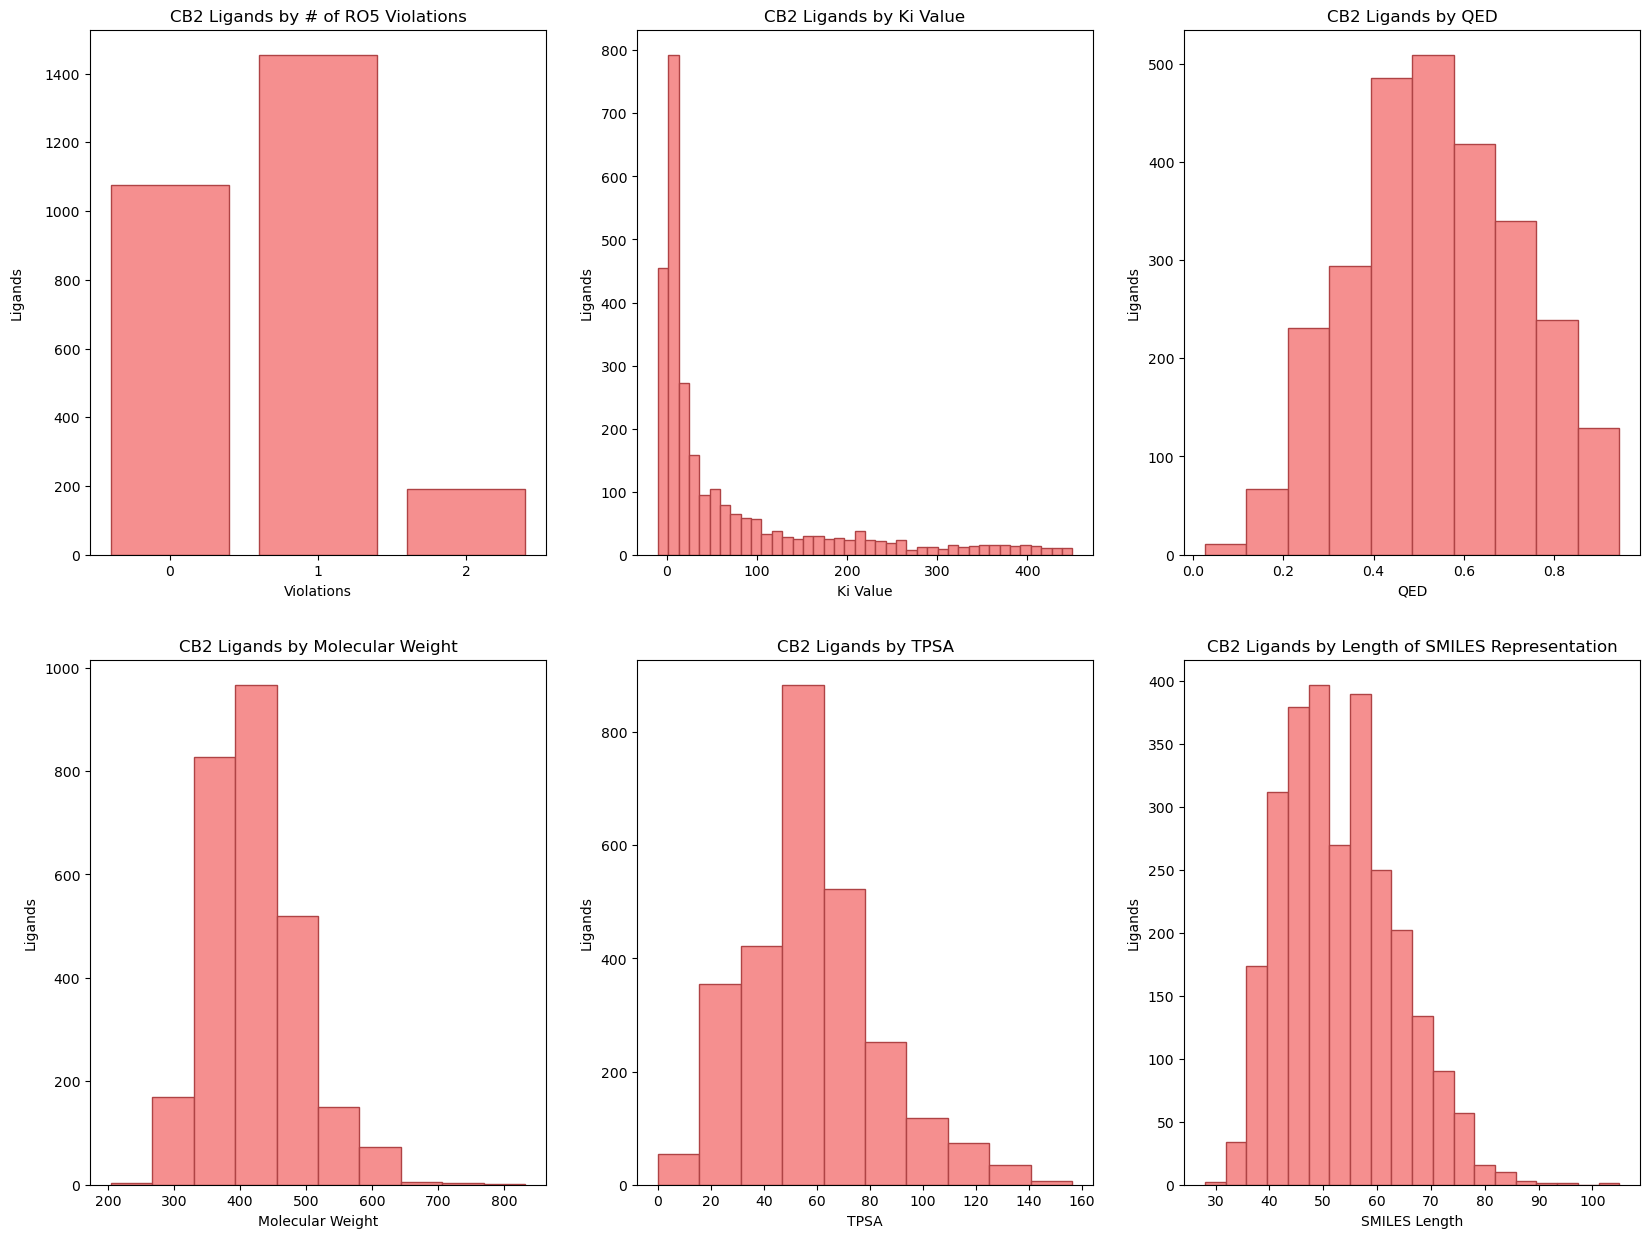

In [10]:
# graph distribution of data in various properties

x_ro5 = [i for i in range(0,3)]
y_ro5 = []
for i in range(0,3):
    ro5_by_val = len(cb2_molecules[cb2_molecules["NumRo5"] == i])
    y_ro5.append(ro5_by_val)

plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
# plt.figure(figsize=(3, 3.5))
plt.bar(x_ro5, y_ro5, color="#f58f8fff", edgecolor="#af4345")
plt.xticks(x_ro5, [0, 1, 2])
plt.title('CB2 Ligands by # of RO5 Violations')
plt.xlabel('Violations')
plt.ylabel('Ligands', labelpad=15)

#---------------------------------------------------------------------

plt.subplot(2, 3, 2)
plt.hist(cb2_molecules["value"], bins=40, color="#f58f8fff", edgecolor="#af4345")
plt.title('CB2 Ligands by Ki Value')
plt.xlabel('Ki Value')
plt.ylabel('Ligands', labelpad=5)

#---------------------------------------------------------------------

plt.subplot(2, 3, 3)
plt.hist(cb2_molecules["qed"], bins=10, color="#f58f8fff", edgecolor="#af4345")
plt.title('CB2 Ligands by QED')
plt.xlabel('QED')
plt.ylabel('Ligands', labelpad=5)

#---------------------------------------------------------------------

plt.subplot(2, 3, 4)
plt.hist(cb2_molecules["MolWt"], bins=10, color="#f58f8fff", edgecolor="#af4345")
plt.title('CB2 Ligands by Molecular Weight')
plt.xlabel('Molecular Weight')
plt.ylabel('Ligands', labelpad=5)

#---------------------------------------------------------------------

plt.subplot(2, 3, 5)
plt.hist(cb2_molecules["TPSA"], bins=10, color="#f58f8fff", edgecolor="#af4345")
plt.title('CB2 Ligands by TPSA')
plt.xlabel('TPSA')
plt.ylabel('Ligands', labelpad=5)

#---------------------------------------------------------------------

plt.subplot(2, 3, 6)
plt.hist(cb2_molecules["smiles_length"], bins=20, color="#f58f8fff", edgecolor="#af4345")
plt.title('CB2 Ligands by Length of SMILES Representation')
plt.xlabel('SMILES Length')
plt.ylabel('Ligands', labelpad=5)

plt.show()

In [11]:
# choose SMILES representations of all CB2 ligands for deep learning
X = cb2_molecules["canonical_smiles"].values

print(f"# of CB2 Ligands: {len(X)}")
print(f"Example SMILES: {X[0]}")

# of CB2 Ligands: 2723
Example SMILES: CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCCc1ccoc1


In [12]:
# save SMILES representations as TXT file
np.savetxt("./data/X_SMILES.txt", X, fmt="%s")
print("Saved")

Saved
